In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder 
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.metrics import accuracy_score # 
import numpy.random as r # We will randomly initialize our weights
from sklearn.cluster import KMeans

path = "/Users/markshi/Desktop/mushrooms.csv"

# Loading and observing the data 

## Quick look

In [40]:
df = pd.read_csv(path)

In [41]:
df.shape

(8124, 23)

In [42]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In the data, there are 23 columns, including the label column and 22 features. 

## Further exploring the data and the features

Text(0.5, 1.0, 'Balance of the data')

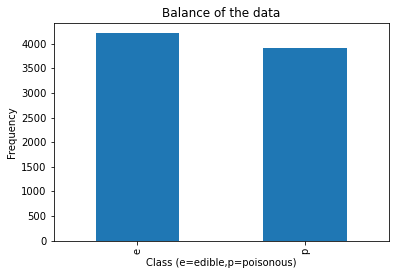

In [43]:
plt.figure()
series = pd.Series(df['class'])
counts = series.value_counts().sort_index()
plot = counts.plot(kind='bar')
plt.xlabel('Class (e=edible,p=poisonous)')
plt.ylabel('Frequency')
plt.title('Balance of the data')


The data is balanced with almost identical number of samples from each class

In [47]:
for feature in df.columns:
    print(feature)
    print(df[feature].value_counts())
    print('=======\n')

class
e    4208
p    3916
Name: class, dtype: int64

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

stalk-root
b 

In [49]:
# label encoding to have visualization 

cate_columns = [a_column for a_column in df.columns if df[a_column].dtype=='object']
encoder = LabelEncoder()
res_df = df.copy()
for col in cate_columns:
    res_df[col] = encoder.fit_transform(df[col]) 

In [50]:
res_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


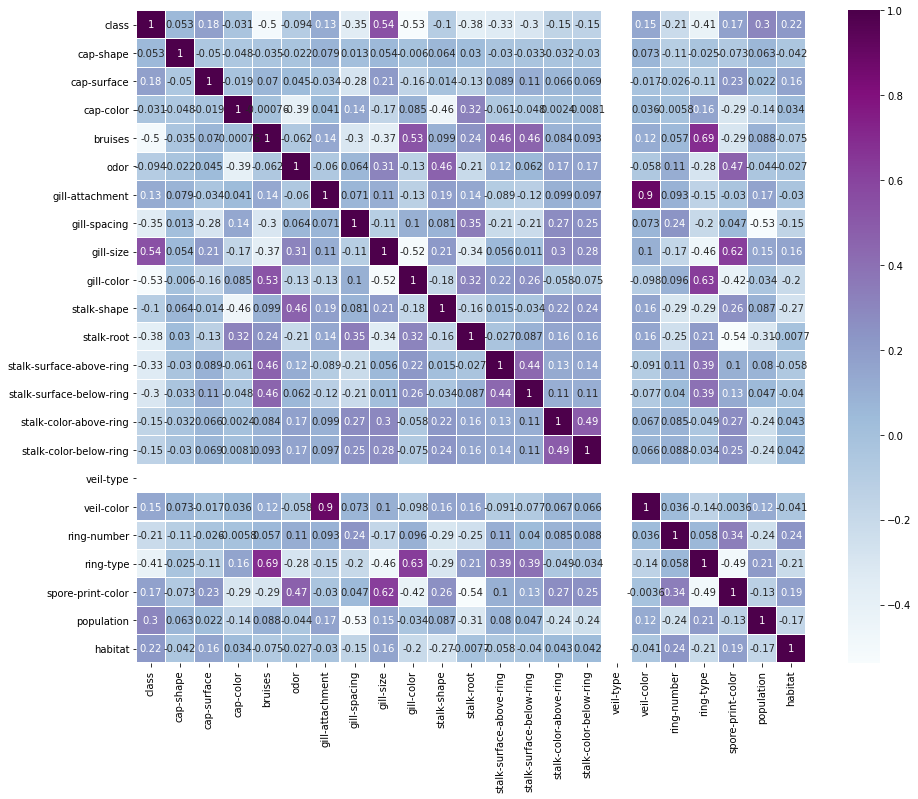

In [51]:
corr = res_df.corr()
plt.figure(figsize=(15,12))
sbn.heatmap(corr,cmap="BuPu",linewidths=0.1,annot=True)

## By printing out the counts of different values in each feature, we can see that the feature "veil-type" has only single value of "p", which makes it irrelevant in the classification problem. Also, by observing the correlation heatmap, we confirm that "veil-type" has no correlation with any other features. So, we drop this column. Furthermore, we can see the feature "gill-color" might be the most useful feature for classification because it has the least correlation value of -0.53, making a "distinguishable" among all features.

In [52]:
df['veil-type'].value_counts()
df.drop(['veil-type'],axis=1)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


# Clustering 

## unsupervised learning using k-mean clustering 

We will try cluster the data into two distinguishable clusters

In [53]:
y = df['class']
X = df.drop(['class'] , axis=1)

label_encoder = LabelEncoder()
for col in X.columns:
    if(len(X[col].value_counts()) ==2):
        X[col] = label_encoder.fit_transform(X[col])

X = pd.get_dummies(X)

In [54]:
km = KMeans(n_clusters=2,init='random',tol=0.0001)
y_km_pred = km.fit_predict(X)

In [55]:
df_clus = pd.DataFrame()
df_clus['Cluster'] = y_km_pred
df_clus['Mushroom Type'] = y

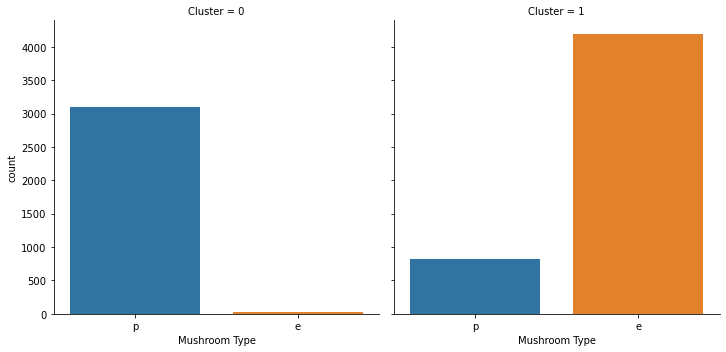

In [56]:
sbn.catplot(col='Cluster', x='Mushroom Type', data=df_clus, kind='count')

One cluster contains mostly poisonous mushrooms and the other contains mostly edible ones. 